In [1]:
!pip install pystan
!pip install fbprophet

In [2]:
#Importing libraries
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
%matplotlib inline
import matplotlib as mpl
from fbprophet import Prophet

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv("/content/gdrive/My Drive/Thesis/dataframe_flow_variable_60min.csv")
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data.rename( columns={'Unnamed: 0':'Date_time','468':'DMA_468'}, inplace=True )

In [6]:
data_DMA468 = data[['Date_time','DMA_468']]

data_DMA468_indexed = data_DMA468.set_index('Date_time')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a27acb510>],
      dtype=object)

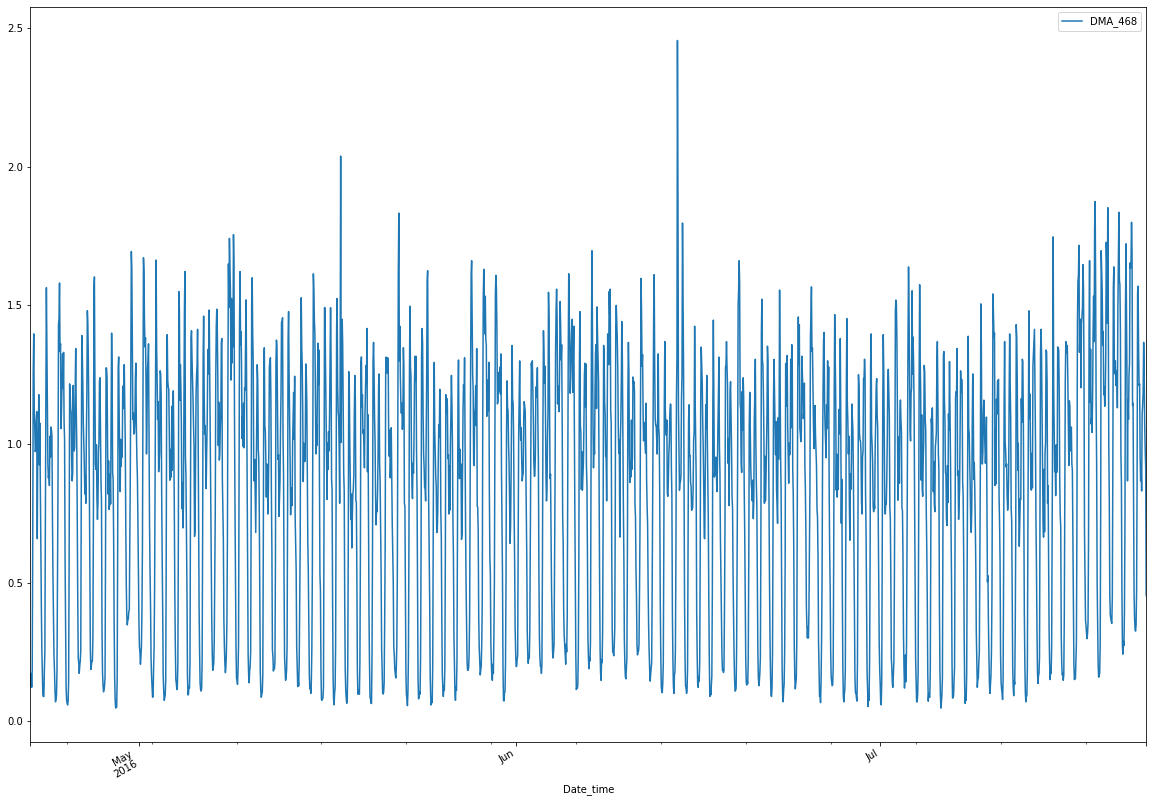

In [8]:
mpl.rcParams['figure.figsize'] = (20, 15)
mpl.rcParams['axes.grid'] = False
data_DMA468_indexed[['DMA_468']].plot(subplots=True)

In [9]:
#Statistical information
data_DMA468_indexed.describe()

,DMA_468
count,2208.000000
mean,0.826767
std,0.456235
min,0.047000
25%,0.369250
50%,0.908250
75%,1.180750
max,2.455750


In [10]:
#general Information
data_DMA468_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2016-04-22 00:00:00 to 2016-07-22 23:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DMA_468  2208 non-null   float64
dtypes: float64(1)
memory usage: 34.5 KB


In [14]:
# Making hourly data 
hourly_data = data_DMA468_indexed.resample('h').sum()

#Resetting index
hourly_data_index = hourly_data.reset_index()
#Renaming columns
hourly_data_index = hourly_data_index.rename(columns= {'Date_time': 'ds', 'DMA_468':'y'})
hourly_data_index.shape

(2208, 2)

In [15]:
#Train and test split
step_out = 24
train = hourly_data_index[:len(hourly_data_index)-step_out]
test = hourly_data_index[len(hourly_data_index)-step_out:]

In [16]:
#Instatntiate model
model = Prophet()
#Train
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [17]:
# Forecast / Predict

future_prediction = model.make_future_dataframe(periods = test.shape[0], freq = '1H')  
forecast_prediction = model.predict(test)
forecast_prediction[['ds', 'yhat']]

,ds,yhat
0,2016-07-22 00:00:00,0.377524
1,2016-07-22 01:00:00,0.305107
2,2016-07-22 02:00:00,0.250864
3,2016-07-22 03:00:00,0.277493
4,2016-07-22 04:00:00,0.456082
5,2016-07-22 05:00:00,0.784594
6,2016-07-22 06:00:00,1.159784
7,2016-07-22 07:00:00,1.435499
8,2016-07-22 08:00:00,1.521188
9,2016-07-22 09:00:00,1.437582


In [18]:
dataList_test = list(test.y.values)

In [19]:
#Calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(dataList_test,forecast_prediction['yhat']))
rmse = round(rmse, 3)
print (" The root mean square vakue on testset: ",rmse)

 The root mean square vakue on testset:  0.173


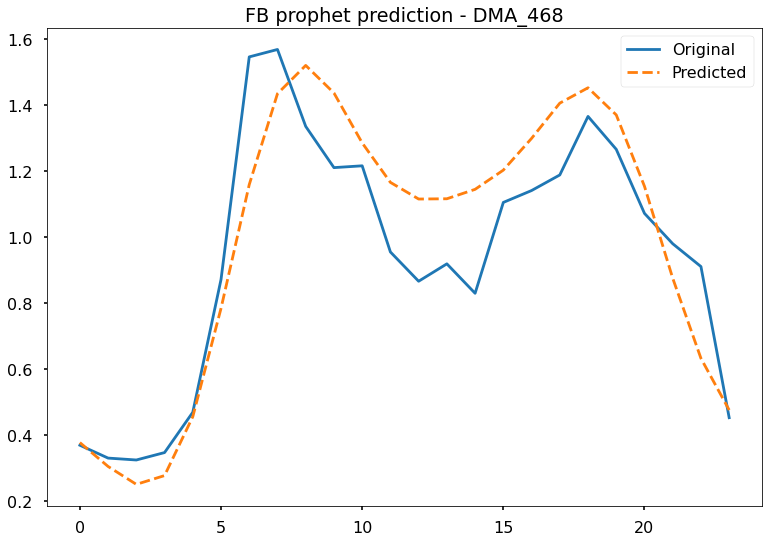

In [20]:
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList_test, label='Original')
plt.plot(forecast_prediction['yhat'].values, ls='--', label="Predicted")
plt.legend(loc='best')
plt.title('FB prophet prediction - DMA_468')
plt.show()